In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

import random, numpy


Input mu, sigma 0.021001590909485255 0.1597970922624286
Calculated mu, sigma -0.0111742372223 0.171929311735


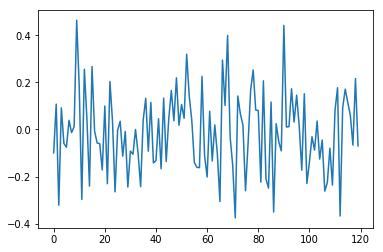

In [3]:
# Single sequence random
periods = 120
# numpy.random.random() gives a random number between 0 and 1
mu = (numpy.random.random()*0.1+0.2)/10
sigma = numpy.random.random()*0.2
print("Input mu, sigma", mu, sigma)
rseq = numpy.random.normal(mu, sigma, periods)
plt.plot(rseq)
print("Calculated mu, sigma", rseq.mean(), rseq.std())

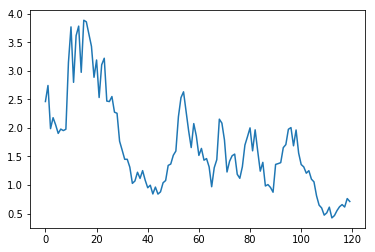

In [4]:
# multiplication of exponentials is same as exponential of cumulative sums
price = numpy.exp(1+rseq.cumsum())
plt.plot(price)

In [8]:
# Now do for the 16 value classes
N = 16
periods = 120
mu = (numpy.random.random(N)*0.1+0.2)/10
sigma = numpy.random.random(N)*0.2

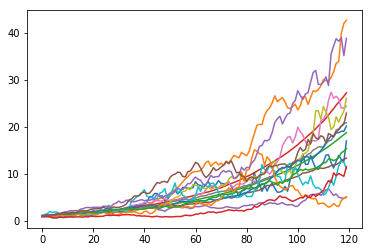

In [13]:
# calculate and plot all prices
rseq = numpy.random.normal(mu, sigma, (periods, N)).T
prices = numpy.exp(rseq.cumsum(axis=1))
for p in prices:
    plt.plot(p)

In [14]:
portfolio = numpy.random.random(N)
portfolio = portfolio/sum(portfolio) # sum to 1

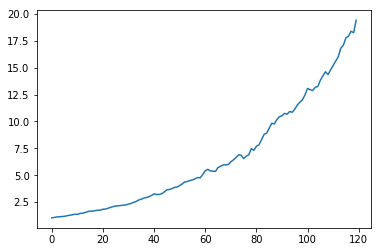

In [15]:
# Single trace from this portfolio
value = numpy.dot(portfolio, prices)
plt.plot(value)

In [24]:
# Now repeat for the population of 500 to create a 3D matrix (a tensor)
M = 500
rseqM = numpy.random.normal(mu, sigma, (periods, M, N)).T
pricesM = numpy.exp(rseqM.cumsum(axis=2))
valueM = numpy.tensordot(pricesM, portfolio, axes=(0,0))

In [44]:
valueM.shape

(500, 120)

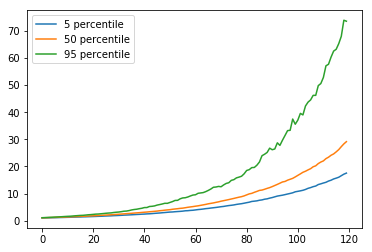

In [48]:
percentiles = [5, 50, 95]
k = numpy.percentile(valueM, percentiles, axis=0)
for i in range(len(percentiles)):
    plt.plot(k[i], label="%d percentile"%percentiles[i])
plt.legend()